In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#user defined functions

#used in Part II
def empty(a):
    pass

# Filtering the banana data based on Hue Saturation and Value

- Code used in this section are based on the code provided in various classes from Linda.com, Murtaza's Workshop - Robotics and AI, and googling the information from stackover flow.

- Color can be decomposed into Red, Green, and Blue (RGB) as well as Hue, Saturation and Value (HSV).
- Decomposing the color of the subject into RGB scale and allow us to quantify what fraction of the color of the subject falls into specific RGB scale, however, this format is not suitable for obtaining the distribution of the colors since some of the can fall into more than two different combination of RGB scale. 
- HSV scale, however, allows us to fix Saturation and Value and only range Hue which allows us to extract the changes in distribution of the color of the subject with respect to treatment and also changes in the condition of the subject over time.

- HSA reference: [LINK](http://colorizer.org)
- based on the information above, set the HSA using the interactive HSA below

**step 0** set hue variables

In [3]:
# Sample figure [(20,179),(108,255),(38,255)]
#HUE
h_min = 20
h_max = 179

#Saturation
s_min = 108
s_max = 255

#Value
v_min = 38
v_max = 255

#select the filtered image
lower = np.array([h_min,s_min,v_min])
upper = np.array([h_max,s_max,v_max])

black = [0, 0, 0]  # RGB for black
diff = 20
boundaries = [([black[2], black[1], black[0]],
               [black[2]+diff, black[1]+diff, black[0]+diff])]

### Block N

**step 1** read csv file

In [18]:
import pandas as pd
import numpy as np
import cv2 as cv2
import os
csv_file_path = 'data/N/experiment3/bananaCovariates.csv'

df = pd.read_csv(csv_file_path, delimiter=',')
dict_banana_N = {}

list_of_rows = [list(row) for row in df.values]

for line in list_of_rows:
    if np.isnan(line[1]) == False:

        dict_banana_N[int(line[1])] = line
        
print(dict_banana_N)
print(dict_banana_N.get(1)[0])

{1: ['N', 1.0, 0.0, 171.0, nan, 136.0, nan, 37.0, 72.0, 40.0, 72.0, 36.0, 73.0, 47.0, 72.0, 47.0, 72.0, 42.0, 72.0, 37.0, 72.0, 32.0, 72.0, 38.0, 72.0, 42.0, 72.0], 2: ['N', 2.0, 1.0, 160.0, 212.0, 128.0, 204.0, 37.0, 72.0, 40.0, 72.0, 36.0, 73.0, 47.0, 72.0, 47.0, 72.0, 42.0, 72.0, 37.0, 72.0, 32.0, 72.0, 38.0, 72.0, 42.0, 72.0], 3: ['N', 3.0, 1.0, 172.0, 216.0, 139.0, 207.0, 37.0, 72.0, 40.0, 72.0, 36.0, 73.0, 47.0, 72.0, 47.0, 72.0, 42.0, 72.0, 37.0, 72.0, 32.0, 72.0, 38.0, 72.0, 42.0, 72.0], 4: ['N', 4.0, 1.0, 162.0, 193.0, 131.0, 186.0, 37.0, 72.0, 40.0, 72.0, 36.0, 73.0, 47.0, 72.0, 47.0, 72.0, 42.0, 72.0, 37.0, 72.0, 32.0, 72.0, 38.0, 72.0, 42.0, 72.0], 5: ['N', 5.0, 0.0, 165.0, nan, 133.0, nan, 37.0, 72.0, 40.0, 72.0, 36.0, 73.0, 47.0, 72.0, 47.0, 72.0, 42.0, 72.0, 37.0, 72.0, 32.0, 72.0, 38.0, 72.0, 42.0, 72.0], 6: ['N', 6.0, 0.0, 162.0, nan, 129.0, nan, 37.0, 72.0, 40.0, 72.0, 36.0, 73.0, 47.0, 72.0, 47.0, 72.0, 42.0, 72.0, 37.0, 72.0, 32.0, 72.0, 38.0, 72.0, 42.0, 72.0], 7: 

**step 2** calculate black_ratio and write the result in the csv file

In [47]:
import pandas as pd
import numpy as np
import cv2 as cv2
import os

folder = 'tmp/banana_images/N/'

for i in range(1, 11, 1):
    day = 't'+ str(i)
    path = folder + 'experiment3/' + day + '/banana'
    idx = 0
    for filename in os.listdir(path):
        if filename.endswith('.jpg'):
            num = ''
            j = 0
            while True:
                if filename[j] == 't':
                    break
                else:
                    num = num + filename[j]
                    j += 1
            img2 = cv2.imread(path + '/' + filename)
            
            h_min = 20
            h_max = 179

            #Saturation
            s_min = 108
            s_max = 255

            #Value
            v_min = 38
            v_max = 255

            #select the filtered image
            lower = np.array([h_min,s_min,v_min])
            upper = np.array([h_max,s_max,v_max])
            
            imgHSV = cv2.cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

            #filtered image
            mask = cv2.inRange(imgHSV, lower, upper)
            imgResult = cv2.bitwise_and(img2,img2, mask = mask)
 
            for (lower, upper) in boundaries:
                lower = np.array(lower, dtype=np.uint8)
                upper = np.array(upper, dtype=np.uint8)
                mask = cv2.inRange(imgResult, lower, upper)
                output = cv2.bitwise_and(imgResult, imgResult, mask=mask)
                
                ratio_black = cv2.countNonZero(mask)/(img2.size/3)
                cov_banana = dict_banana_N.get(int(num))
                if cov_banana[2] == 0:
                    treat = 'control'
                else:
                    treat = 'treatment'
                if i == 1:
                    weight = dict_banana_N.get(int(num))[3]
                elif i == 10:
                    weight = dict_banana_N.get(int(num))[5]
                else:
                    weight = 777
                
                save_str = str(cov_banana[0]) + ","  + str(num) + "," + str(treat) + "," + str(i) + "," + str(cov_banana[2*int(i)+5]) + "," + str(cov_banana[2*int(i)+5+1]) + "," + str(ratio_black) + "," + str(weight) + "\n"
                with open("banana.csv", mode="a") as f:
                    f.write(save_str)

### Block B (treatment group)

**step 1** create humidity and temperature dictionary

In [48]:
dict_banana_B = {}
dict_banana_B[1] = [43,73]
dict_banana_B[2] = [45, 77]
dict_banana_B[3] = [50, 79]
dict_banana_B[4] = [46, 73]
dict_banana_B[5] = [48, 73]
dict_banana_B[6] = [50, 77]
dict_banana_B[7] = [46, 75]
dict_banana_B[8] = [45, 75]
dict_banana_B[9] = [48, 70]
dict_banana_B[10] = [46, 73]

**step 2** read csv file

In [49]:
dict_banana_B_weight = {}
csv_file_path = 'data/B/experiment2/bananaCovariate.csv'

df = pd.read_csv(csv_file_path, delimiter=',')
list_of_rows = [list(row) for row in df.values]
for line in list_of_rows:
    if np.isnan(line[1]) == False:
        dict_banana_B_weight[int(line[0])] = [line[2], line[3]]
        
print(dict_banana_B_weight)

{1: [152, 130], 2: [171, 148], 3: [165, 142], 4: [164, 137], 5: [140, 116], 6: [145, 122], 7: [157, 128], 8: [150, 124]}


**step 3** calculate black_ratio and write the result in the csv file

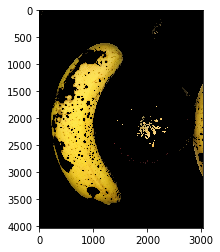

In [50]:
import pandas as pd
import numpy as np
import cv2 as cv2
import os

folder = 'data/B/'

for i in range(1, 11, 1):
    day = 't'+ str(i)
    path = folder + 'experiment2/' + day
    idx = 0
    for filename in os.listdir(path):
        if filename.startswith('s') and filename.endswith('.jpg'):
            num = filename[1]

            img2 = cv2.imread(path + '/' + filename)
            
            h_min = 20
            h_max = 179

            #Saturation
            s_min = 108
            s_max = 255

            #Value
            v_min = 38
            v_max = 255

            #select the filtered image
            lower = np.array([h_min,s_min,v_min])
            upper = np.array([h_max,s_max,v_max])
            
            imgHSV = cv2.cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

            #filtered image
            mask = cv2.inRange(imgHSV, lower, upper)
            imgResult = cv2.bitwise_and(img2,img2, mask = mask)
            #using filtered images to create new image this is adding two images together    
            plt.imshow(cv2.cvtColor(imgResult, cv2.COLOR_BGR2RGB))
            
            for (lower, upper) in boundaries:
                lower = np.array(lower, dtype=np.uint8)
                upper = np.array(upper, dtype=np.uint8)
                mask = cv2.inRange(imgResult, lower, upper)
                output = cv2.bitwise_and(imgResult, imgResult, mask=mask)
                
                ratio_black = cv2.countNonZero(mask)/(img2.size/3)
                
                if i == 1:
                    weight = dict_banana_B_weight.get(int(num))[0]
                elif i == 10:
                    weight = dict_banana_B_weight.get(int(num))[1]
                else:
                    weight = 777
                save_str = "B, " + str(num) + "," + str("treatment") + "," + str(i) + "," + str(dict_banana_B.get(int(i))[0]) + "," + str(dict_banana_B.get(int(i))[1]) + "," + str(ratio_black) + "," + str(weight) + "\n"
                with open("banana.csv", mode="a") as f:
                    f.write(save_str)

### Block B (control group)

**step 3** calculate black_ratio and write the result in the csv file

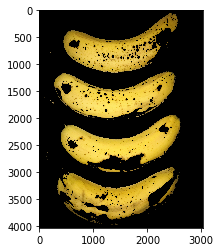

In [51]:
import pandas as pd
import numpy as np
import cv2 as cv2
import os

folder = 'data/B/'
control = [1, 5, 6, 8]

for i in range(1, 11, 1):
    day = 't'+ str(i)
    path = folder + 'experiment2/' + day
    idx = 0
    for filename in os.listdir(path):
        if filename.startswith('bc') and filename.endswith('.jpg'):
            num = filename[1]
            img2 = cv2.imread(path + '/' + filename)
            
            h_min = 20
            h_max = 179

            #Saturation
            s_min = 108
            s_max = 255

            #Value
            v_min = 38
            v_max = 255

            #select the filtered image
            lower = np.array([h_min,s_min,v_min])
            upper = np.array([h_max,s_max,v_max])
            
            imgHSV = cv2.cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

            #filtered image
            mask = cv2.inRange(imgHSV, lower, upper)
            imgResult = cv2.bitwise_and(img2,img2, mask = mask)
            #using filtered images to create new image this is adding two images together    
            plt.imshow(cv2.cvtColor(imgResult, cv2.COLOR_BGR2RGB))
            
            for (lower, upper) in boundaries:
                lower = np.array(lower, dtype=np.uint8)
                upper = np.array(upper, dtype=np.uint8)
                mask = cv2.inRange(imgResult, lower, upper)
                output = cv2.bitwise_and(imgResult, imgResult, mask=mask)
                
                ratio_black = cv2.countNonZero(mask)/(img2.size/3)
                for item in control:
                    if i == 1:
                        weight = dict_banana_B_weight.get(int(item))[0]
                    elif i == 10:
                        weight = dict_banana_B_weight.get(int(item))[1]
                    else:
                        weight = 777
                    save_str = "B, " + str(item) + "," + str("control") + "," + str(i) + "," + str(dict_banana_B.get(int(i))[0]) + "," + str(dict_banana_B.get(int(i))[1]) + "," + str(ratio_black) + "," + str(weight) + "\n"
                    with open("banana.csv", mode="a") as f:
                        f.write(save_str)

### Block J

**step 1** read csv file

In [67]:
dict_banana_J = {}
csv_file_path = 'data/J/experiment2/bananaCovariates.csv'

df = pd.read_csv(csv_file_path, delimiter=',')
list_of_rows = [list(row) for row in df.values]

for line in list_of_rows:
    if line[1].find('b') != -1:
        j = 0
        while True:
            if line[1][j] == 'b':
                banana_num = line[1][j+1]
                break
            else:
                j += 1
        dict_banana_J[int(banana_num)] = line
        
print(dict_banana_J)

{2: ['J', 'b2', 0, 159.0, nan, 133.0, nan, 36, 66, 40, 63, 43, 63, 41, 66, 41, 64, 40, 61, 41, 63, 39, 61, 40, 61, 39, 66], 4: ['J', 'b4', 0, 175.0, nan, 142.0, nan, 36, 66, 40, 63, 43, 63, 41, 66, 41, 64, 40, 61, 41, 63, 39, 61, 40, 61, 39, 66], 5: ['J', 'b5', 0, 161.0, nan, 126.0, nan, 36, 66, 40, 63, 43, 63, 41, 66, 41, 64, 40, 61, 41, 63, 39, 61, 40, 61, 39, 66], 6: ['J', 'b6', 0, 171.0, nan, 143.0, nan, 36, 66, 40, 63, 43, 63, 41, 66, 41, 64, 40, 61, 41, 63, 39, 61, 40, 61, 39, 66], 7: ['J', 'b7', 0, 146.0, nan, 116.0, nan, 36, 66, 40, 63, 43, 63, 41, 66, 41, 64, 40, 61, 41, 63, 39, 61, 40, 61, 39, 66], 8: ['J', 'a2b8', 1, 185.0, 195.0, 148.0, 190.0, 36, 66, 40, 63, 43, 63, 41, 66, 41, 64, 40, 61, 41, 63, 39, 61, 40, 61, 39, 66], 3: ['J', 'a5b3', 1, 159.0, 198.0, 117.0, 194.0, 36, 66, 40, 63, 43, 63, 41, 66, 41, 64, 40, 61, 41, 63, 39, 61, 40, 61, 39, 66], 9: ['J', 'a8b9', 1, 166.0, 195.0, 138.0, 188.0, 36, 66, 40, 63, 43, 63, 41, 66, 41, 64, 40, 61, 41, 63, 39, 61, 40, 61, 39, 66

**step 2** calculate black_ratio and write the result in the csv file

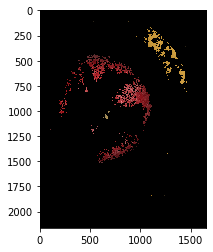

In [69]:
import pandas as pd
import numpy as np
import cv2 as cv2
import os

folder = 'data/J/'

for i in range(1, 11, 1):
    day = 't'+ str(i)
    path = folder + 'experiment2/' + day
    idx = 0
    for filename in os.listdir(path):
        if filename.find('b') != -1:
            #num = filename[1]
            j = 0
            while True:
                if filename[j] == 'b':
                    num = filename[j+1]
                    break
                else:
                    j += 1
            img2 = cv2.imread(path + '/' + filename)
            
            h_min = 20
            h_max = 179

            #Saturation
            s_min = 108
            s_max = 255

            #Value
            v_min = 38
            v_max = 255

            #select the filtered image
            lower = np.array([h_min,s_min,v_min])
            upper = np.array([h_max,s_max,v_max])
            
            imgHSV = cv2.cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

            #filtered image
            mask = cv2.inRange(imgHSV, lower, upper)
            imgResult = cv2.bitwise_and(img2,img2, mask = mask)
            #using filtered images to create new image this is adding two images together    

            plt.imshow(cv2.cvtColor(imgResult, cv2.COLOR_BGR2RGB))
            
            for (lower, upper) in boundaries:
                lower = np.array(lower, dtype=np.uint8)
                upper = np.array(upper, dtype=np.uint8)
                mask = cv2.inRange(imgResult, lower, upper)
                output = cv2.bitwise_and(imgResult, imgResult, mask=mask)
                
                ratio_black = cv2.countNonZero(mask)/(img2.size/3)
                #print(ratio_black)
                cov_banana_J = dict_banana_J.get(int(num))
                if cov_banana_J[2] == 0:
                    treat = 'control'
                else:
                    treat = 'treatment'
                if i == 1:
                    weight = dict_banana_J.get(int(num))[3]
                elif i == 10:
                    weight = dict_banana_J.get(int(num))[5]
                else:
                    weight = 777
                
                save_str = str(cov_banana_J[0]) + ","  + str(num) + "," + str(treat) + "," + str(i) + "," + str(cov_banana_J[2*int(i)+5]) + "," + str(cov_banana_J[2*int(i)+5+1]) + "," + str(ratio_black) + "," + str(weight) + "\n"
                with open("banana.csv", mode="a") as f:
                    f.write(save_str)